In [3]:
#Instalo e importo paquetes 

!pip install pandas
import pandas as pd 

import numpy as np 
import os

from IPython.display import Image, display, HTML

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

import seaborn as sns

from datetime import datetime




In [2]:
html_texto = """
<h3 style="color: navy;">Parte I: Creación de variables, histogramas, kernels y resumen de la base de datos final</h3>
<p> 
La idea de esta primera parte es que completen la limpieza de la base de datos que contiene las observaciones del primer trimestre de 2005 y del 
primer trimestre de 2025. La base final a trabajar resultante debe incluir todas las variables presentes en ambos trimestres, expresadas de manera 
homogénea. Es decir, si la variable CH04 en 2005 toma los valores “Hombre” o “Mujer”, y en 2025 toma los valores 1 y 2, la variable limpia 
en la base final debe tener solamente dos valores consistentes. 
</p>
"""
display(HTML(html_texto))


In [6]:
############# INDIVIDUOS  ##############

#SUBO EL SET DE DATOS INDIVISUALES DEL PRIMER TRIMESTRE DE 2025
t0125 = pd.read_excel('usu_individual_T125.xlsx')

#SUBO EL SET DE DATOS INDIVISUALES DEL PRIMER TRIMESTRE DE 2005
t0105 = pd.read_stata('Individual_t105.dta')

############# HOGARES  ##############

#SUBO EL SET DE DATOS HOGARES DEL PRIMER TRIMESTRE DE 2025
th0125 = pd.read_excel('usu_hogar_T125.xlsx')
#th0125

#SUBO EL SET DE DATOS HOGARES DEL PRIMER TRIMESTRE DE 2005
th0105 = pd.read_stata('Hogar_t105.dta')



In [100]:
th0105.columns

Index(['CODUSU', 'nro_hogar', 'realizada', 'ano4', 'trimestre', 'region',
       'mas_500', 'aglomerado', 'pondera', 'iv1', 'iv1_esp', 'iv2', 'iv3',
       'iv3_esp', 'iv4', 'iv5', 'iv6', 'iv7', 'iv7_esp', 'iv8', 'iv9', 'iv10',
       'iv11', 'iv12_1', 'iv12_2', 'iv12_3', 'ii1', 'ii2', 'ii3', 'ii3_1',
       'ii4_1', 'ii4_2', 'ii4_3', 'ii5', 'ii5_1', 'ii6', 'ii6_1', 'ii7',
       'ii7_esp', 'ii8', 'ii8_esp', 'ii9', 'v1', 'v2', 'v21', 'v22', 'v3',
       'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11', 'v12', 'v13', 'v14',
       'v15', 'v16', 'v17', 'v18', 'v19_a', 'v19_b', 'IX_Tot', 'IX_Men10',
       'IX_Mayeq10', 'itf', 'decifr', 'idecifr', 'rdecifr', 'gdecifr',
       'pdecifr', 'adecifr', 'ipcf', 'deccfr', 'ideccfr', 'rdeccfr', 'gdeccfr',
       'pdeccfr', 'adeccfr', 'vii1_1', 'vii1_2', 'vii2_1', 'vii2_2', 'vii2_3',
       'vii2_4', 'idimph'],
      dtype='object')

In [7]:
#CREO UNA FUNCION QUE ME TRANSFORME EL TIPO DE DATO DE LA COLUMNA EN CUESTION.
#LE DEBO CARGAR EL NOMBRE DEL DATAFRAME, EL NOMBRE DE LA COLUMNA Y EL MAPEO DE DATOS QUE DEBE TRANSFORMAR

def mapear_columna(df, columna, diccionario):
    
    #Creo esta lista para ir depositando los errores que vaya encontrado la transformacion y después ver qué corregir 
    errores = []

    # Asegura que la columna esté en formato string para comparar
    df[columna] = df[columna].astype(str)

    #Armo un bucle para que recorra todas las celdas de la columna y vaya tranformando los datos segun el diccionario.
    #Para ello utilizo la función .at[] con la que modifico una sola celda en un DataFrame, usando la combinación de índice y nombre de columna.
    
    for i in df.index:
        valor = df.at[i, columna]
        if valor in diccionario:
            df.at[i, columna] = diccionario[valor]
        else:
            errores.append((i, valor))

    # Convierte la columna al tipo int64 si todo salió bien
    try:
        df[columna] = df[columna].astype('int64')
    except ValueError:
        pass  # Si hay errores, no se puede convertir

    return df, errores

In [8]:
############# EMPIEZO A HOMOGENEIZAR LOS DATOS  ##############

#region 2005
mapa = {    'Gran Buenos Aires': 1,    'NOA':40,    'NEA':41,    'Cuyo':42,    'Pampeana':43,    'Patagónica':44 }
t0105, errores = mapear_columna(t0105, 'region', mapa)


#aglomerado 2005
mapa = {'Gran La Plata': 2, 'Bahía Blanca - Cerri': 3,'Gran Rosario': 4,'Gran Santa Fe': 5,'Gran Paraná': 6,'Posadas': 7,
        'Gran Resistencia': 8, 'Gran Mendoza': 10,'Corrientes': 12,'Gran Córdoba': 13,'Concordia': 14,'Formosa': 15,
        'Cdro. Rivadavia – Rada Tilly': 9, 'Comodoro Rivadavia - Rada Tilly':9,
        'Neuquén – Plottier': 17,'Neuquén - Plottier':17,
        'S.del Estero - La Banda': 18,'Santiago del Estero - La Banda':18,
        'Jujuy - Palpalá': 19,'Río Gallegos': 20,'Gran Catamarca': 22,'Salta': 23,'La Rioja': 25,
        'San Luis - El Chorrillo': 26,'Gran San Juan': 27,'Gran Tucumán - T. Viejo': 29, 'Gran Tucumán - Tafí Viejo':29,
        'Santa Rosa - Toay': 30, 'Ushuaia - Río Grande': 31,'Ciudad de Buenos Aires': 32,'Partidos del GBA': 33,
        'Mar del Plata - Batán': 34,'Río Cuarto': 36
}
t0105, errores = mapear_columna(t0105, 'aglomerado', mapa)

In [9]:
#ch3 2005
mapa = {       'Jefe/a': 1,     'Jefe': 1,     'Cónyuge/pareja': 2,    'Cónyuge/Pareja': 2,    'Hijo/a/hijastro/a': 3,  'Hijo/Hijastro': 3,
         'Yerno/nuera': 4,   'Yerno/Nuera': 4,    'Nieto/a': 5,            'Nieto': 5,         'Madre/padre': 6,         'Madre/Padre': 6,
         'Suegro/a': 7,             'Suegro': 7, 'Hermano/a': 8,          'Hermano': 8,
    'Otros familiares': 9,    'No familiares': 10
}
t0105, errores = mapear_columna(t0105, 'ch03', mapa)

#ch04 2005 lo llevo a numerico dummies.. En 2025, retransformo como dummie llevando a mujer a 0 en lugar de 2
mapa = {    'Varón': 1,    'Mujer': 0  }
t0105, errores = mapear_columna(t0105, 'ch04', mapa)

t0125['CH04'] = np.where(t0125['CH04']  ==  1,1,0)

######################################################################
#Para el 2005 - Llevo de 1 a 97 años para homogeneizar xq en 2005 a ese sector lo trataban con un texto
t0105['ch06'] = t0105['ch06'].astype(str)

t0105 = t0105.loc[
    (t0105['ch06'] != 'Menos de 1 año') & 
    (t0105['ch06'] != '98 y más años')
]

t0105['ch06'] = pd.to_numeric(t0105['ch06'], errors='coerce')

#############

#Para el 2025
t0125['CH06'] = t0125['CH06'].astype(str)

t0125 = t0125.loc[
    (t0125['CH06'] != 'Menos de 1 año') & 
    (t0125['CH06'] != '98 y más años') &
    (t0125['CH06'] != '98') & (t0125['CH06'] != '99') & (t0125['CH06'] != '100') & (t0125['CH06'] != '101') & 
    (t0125['CH06'] != '102') & (t0125['CH06'] != '103') & 
    (t0125['CH06'] != '-1') 
]

#una vez recodificado transformo el tipo de dato
t0125['CH06'] = pd.to_numeric(t0125['CH06'], errors='coerce')


In [10]:
#####################################################
#CH07 - 

mapa = {    'Unido':1, 'Casado':2, 'Separado o divorciado':3, 'Viudo':4, 'Soltero':5  }
t0105, errores = mapear_columna(t0105, 'ch07', mapa)

#En 2005 habia una opcion Ns/Nr que no tiene tipificacion en 2025 así que lo haré Null
t0105['ch07'] = t0105['ch07'].replace('Ns/Nr', np.nan)

#####################################################
#CH08
# Hay items escritos de maneras diferentes, pero como los diccionarios nos permites repetir valores pero No Keys, 
# repetimos el código tipificado con su key diferente

mapa = {
'Obra social (incluye PAMI)':1, 'Mutual/Prepaga/Servicio de emergencia':2, 'Planes y seguros públicos':3, 'No paga ni le descuentan':4, 'Ns./Nr.':9, 
'Obra social y mutual/prepaga/servicio de emergencia':12, 'Obra social y planes y seguros públicos':13, 
'Mutual /prepaga / servicio de emergencia / Planes y Seguros Públicos':23, 
'Mutual/prepaga/servicio de emergencia/planes y seguros públi':23,
'Obra social, mutual/prepaga/servicio de emergencia y planes':123, 
'Obra social, mutual / prepaga / servicio de emergencia y Planes y Seguros Públicos':123
}

t0105, errores = mapear_columna(t0105, 'ch08', mapa)
#####################################################

#Para ch12
# Se tomara como null los codigos no tipificados como el 0 o 99, el Ns/Nc, y el 0.0 que aparecen entre los registros.

mapa = {'Jardín/Preescolar' : 1,	'Jardín/preescolar' : 1, 'Primario' : 2, 'EGB' : 3, 'Secundario' : 4, 'Polimodal' : 5, 
        'Terciario' : 6, 'Universitario' : 7, 'Posgrado universitario' : 8, 'Posgrado Universitario' : 8, 
            'Educación especial (discapacidad)' : 9,  'Educación especial (discapacitado)':9
           }

t0105, errores = mapear_columna(t0105, 'ch12', mapa)

#
t0105['ch07'] = t0105['ch07'].replace(0, np.nan)
t0105['ch07'] = t0105['ch07'].replace('0.0', np.nan)
t0105['ch07'] = t0105['ch07'].replace(99, np.nan)
t0105['ch07'] = t0105['ch07'].replace('Ns/Nr', np.nan)


##############################################################################################################################
#Para ch13
# acá existe tupificacion, recategorizo valores como 0 o 0.0 a "no sabe/ no contesta"
mapa = {'Sí': 1, 'No':2, 
        'Ns/Nr':9, 'Ns./Nr.':9, '0':9, '0.0':9        }
t0105, errores = mapear_columna(t0105, 'ch13', mapa)



##############################################################################################################################
#CH14

#Primero lo llevo a string para despues llevarlo a numerico al campo del ultimo curso aprobado

t0105['ch14'] = t0105['ch14'].astype(str).str.strip()
t0105['ch14'] = pd.to_numeric(t0105['ch14'], errors='coerce')

#reemplaza los valores nulos por el 0, que si esta tipificado aqui
t0105['ch14'] = t0105['ch14'].fillna(0)

In [11]:

#nivel_ed


#Para el Nivel educativo

mapa = {'Primaria Completa':2, 'Primaria Incompleta (incluye educación especial)':1, 'Secundaria Completa':4, 
            'Secundaria Incompleta':3, 'Sin instrucción':7, 'Superior Universitaria Completa':6, 
            'Superior Universitaria Incompleta':5, 'Ns/Nr':9
           }

t0105, errores = mapear_columna(t0105, 'nivel_ed', mapa)

#############################################################

#estado

mapa = {'Entrevista individual no realizada (no respuesta al cuestion':0, 
                'Ocupado':1, 'Desocupado':2, 'Inactivo':3, 'Menor de 10 años':4
               }

t0105, errores = mapear_columna(t0105, 'estado', mapa)

#############################################################

#Para cat_ocup - la categoria ocupacional

mapa = {'Patrón':1, 'Cuenta propia':2, 'Obrero o empleado':3,
              'Trabajador familiar sin remuneración':4,'Nr/Nr':9
             }
t0105, errores = mapear_columna(t0105, 'cat_ocup', mapa)

t0105['cat_ocup'] = pd.to_numeric(t0105['cat_ocup'], errors='coerce')

#############################################################

#CAT_INAC

cat_inac_map = {'Ama de casa':4, 'Discapacitado':6, 'Estudiante':3, 'Jubilado/pensionado':1, 
                'Menor de 6 años':5, 'Otros':7, 'Rentista':2
               }
t0105, errores = mapear_columna(t0105, 'cat_inac', cat_inac_map)

t0105['cat_inac'] = pd.to_numeric(t0105['cat_inac'], errors='coerce')

#############################################################

#En p21 hay valores -9, pasaran a ser considerados como cero

t0125['P21'] = t0125['P21'].fillna(0)

#############################################################
# Se termina de limpiar datos de ambas bases. 

#Como el valor "0" no esta tipificado dentro de los cuadros de referencia, lo reemplazare por un valor nulo

t0105['cat_inac'] = t0105['cat_inac'].replace(0, np.nan)
t0125['CAT_INAC'] = t0125['CAT_INAC'].replace(0, np.nan)

t0105['cat_ocup'] = t0105['cat_ocup'].replace(0, np.nan)
t0125['CAT_OCUP'] = t0125['CAT_OCUP'].replace(0, np.nan)

#Ahora, a los Nulos de  CAT_OCUP los convierto en el codigo de Ns/Nc que si esta tipificado
t0105['cat_ocup'] = t0105['cat_ocup'].fillna(9)



In [12]:

#PP04B_COD


t0105['pp04b_cod'] = pd.to_numeric(t0105['pp04b_cod'], errors='coerce')
t0105['pp04b_cod'] = t0105['pp04b_cod'].replace(0, np.nan)

#Porque sino despues no voy a poder concatenar los 2 Dataframes 
t0125['PP04B_COD'] = pd.to_numeric(t0125['PP04B_COD'], errors='coerce')

##############################################################################################################################
# PP3F_TOT y PP3E_TOT 


#Trasformo los valores mayores a 112hs (16hs diarios) semanales se los considerará nulos

t0125['PP3E_TOT'] = np.where(t0125['PP3E_TOT'] >112,np.nan,t0125['PP3E_TOT'])
t0105['pp3e_tot'] = np.where(t0105['pp3e_tot'] >112,np.nan,t0105['pp3e_tot'])

t0125['PP3F_TOT'] = np.where(t0125['PP3F_TOT'] >112,np.nan,t0125['PP3F_TOT'])
t0105['pp3f_tot'] = np.where(t0105['pp3f_tot'] >112,np.nan,t0105['pp3f_tot'])


#TRANSFORMO LOS DATOS EN 0´s EN NULLs Y A LOS 999 EN 0

t0125['PP3E_TOT'] = np.where(t0125['PP3E_TOT']  ==  999,np.nan,t0125['PP3E_TOT'])
t0105['pp3e_tot'] = np.where(t0105['pp3e_tot']  ==  999,np.nan,t0105['pp3e_tot'])


t0125['PP3F_TOT'] = np.where(t0125['PP3F_TOT']  ==  999,np.nan,t0125['PP3F_TOT'])
t0105['pp3f_tot'] = np.where(t0105['pp3f_tot']  ==  999,np.nan,t0105['pp3f_tot'])


t0105['pp3e_tot'] = t0105['pp3e_tot'].replace(0, np.nan)
t0125['PP3E_TOT'] = t0125['PP3E_TOT'].replace(0, np.nan)

##############################################################################################################################

#AGREGO UNA COLUMNA EN CADA TRIMESTRE PARA INDICAR EL AÑO

t0105['ANIO'] = np.int64(2005)
t0125['ANIO'] = np.int64(2025)


In [101]:

#AHORA VOY ESTABLECER LAS COLUMNAS CON LAS QUE ME VOY A QUEDAR, EN LAS 2 TABLAS

t0105_sel_c = t0105[[
'CODUSU', 'nro_hogar', 'region', 'aglomerado', 'pondera', 'ch03', 'ch04', 'ch06', 'ch07', 'ch08', 'ch12', 'ch13', 'ch14', 
    'nivel_ed', 'estado', 'cat_ocup', 'cat_inac', 'pp3e_tot', 'pp3f_tot', 'pp04b_cod', 'p21', 'itf', 'ipcf', 'ANIO',"componente"
]].copy()

t0125_sel_c = t0125[[
'CODUSU', 'NRO_HOGAR', 'REGION', 'AGLOMERADO', 'PONDERA', 'CH03', 'CH04', 'CH06', 'CH07', 'CH08', 'CH12', 'CH13', 'CH14', 
    'NIVEL_ED', 'ESTADO', 'CAT_OCUP', 'CAT_INAC', 'PP3E_TOT', 'PP3F_TOT', 'PP04B_COD', 'P21', 'ITF', 'IPCF', 'ANIO',"COMPONENTE" 
]].copy()



In [50]:
#Tengo que renombrar las columnas para que ambos dataframes tengan igual nombre porque sino 
#no voy a poder poder concatenar correctamente (en la misma columna, una abajo de la otra)los 2 DataFrames

t0105_sel_c = t0105_sel_c.rename(columns={
'nro_hogar': 'NRO_HOGAR',
'region':'REGION',
'aglomerado': 'AGLOMERADO',
'pondera': 'PONDERA',
'ch03': 'CH03',
'ch04': 'CH04',
'ch06': 'CH06',
'ch07': 'CH07',
'ch08': 'CH08',
'ch12': 'CH12', 
'ch13': 'CH13', 
'ch14': 'CH14',
'nivel_ed': 'NIVEL_ED',
'estado': 'ESTADO',
'cat_ocup': 'CAT_OCUP',
'cat_inac': 'CAT_INAC',
'pp3e_tot': 'PP3E_TOT', 
'pp3f_tot': 'PP3F_TOT',
'pp04b_cod': 'PP04B_COD',
'p21':'P21',
'itf':'ITF',
'ipcf': 'IPCF',
'componente': 'COMPONENTE'    
})




In [51]:

#Ahora uno a las 2 bases de datos individuales del 2.a

sel_indiv_c = pd.concat([t0125_sel_c, t0105_sel_c], axis=0, ignore_index=True)
#sel_indiv= sel_t0125.append(sel_t0105)

sel_indiv_c.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91431 entries, 0 to 91430
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CODUSU      91431 non-null  object 
 1   NRO_HOGAR   91431 non-null  float64
 2   REGION      91431 non-null  int64  
 3   AGLOMERADO  91431 non-null  int64  
 4   PONDERA     91431 non-null  float64
 5   CH03        91431 non-null  int64  
 6   CH04        91431 non-null  int64  
 7   CH06        91431 non-null  float64
 8   CH07        91431 non-null  object 
 9   CH08        91430 non-null  float64
 10  CH12        91431 non-null  object 
 11  CH13        91431 non-null  int64  
 12  CH14        68397 non-null  float64
 13  NIVEL_ED    91431 non-null  int64  
 14  ESTADO      91431 non-null  int64  
 15  CAT_OCUP    67448 non-null  float64
 16  CAT_INAC    49404 non-null  float64
 17  PP3E_TOT    34838 non-null  float64
 18  PP3F_TOT    66367 non-null  float64
 19  PP04B_COD   38159 non-nul

In [52]:
# AHORA UNON DE HOGARES
sel_indiv_c = sel_indiv_c[sel_indiv_c["REGION"] == 40]
sel_indiv_c

,CODUSU,NRO_HOGAR,REGION,AGLOMERADO,PONDERA,CH03,CH04,CH06,CH07,CH08,...,CAT_OCUP,CAT_INAC,PP3E_TOT,PP3F_TOT,PP04B_COD,P21,ITF,IPCF,ANIO,COMPONENTE
30,TQRMNORWTHJOKOCDEGPDJ00875828,1.0,40,19,200.0,1,0,73.0,5,1.0,...,NaN,1.0,NaN,NaN,NaN,0.0,1590000.0,198750.0,2025,1
31,TQRMNORWTHJOKOCDEGPDJ00875828,1.0,40,19,200.0,3,0,38.0,5,1.0,...,3.0,NaN,15.0,0.0,9700.0,150000.0,1590000.0,198750.0,2025,2
32,TQRMNORWTHJOKOCDEGPDJ00875828,1.0,40,19,200.0,5,0,34.0,5,1.0,...,3.0,NaN,8.0,0.0,9700.0,60000.0,1590000.0,198750.0,2025,3
33,TQRMNORWTHJOKOCDEGPDJ00875828,1.0,40,19,200.0,5,1,19.0,5,1.0,...,NaN,7.0,NaN,NaN,NaN,0.0,1590000.0,198750.0,2025,4
34,TQRMNORWTHJOKOCDEGPDJ00875828,1.0,40,19,200.0,5,1,16.0,5,1.0,...,NaN,7.0,NaN,NaN,NaN,0.0,1590000.0,198750.0,2025,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63650,287879,1.0,40,29,266.0,3,0,10.0,5,2.0,...,9.0,3.0,NaN,0.0,NaN,0.0,390.0,130.0,2005,3.0
63651,288077,1.0,40,29,555.0,1,1,31.0,2,1.0,...,3.0,NaN,NaN,0.0,5306.0,1500.0,2250.0,562.5,2005,1.0
63652,288077,1.0,40,29,555.0,2,0,29.0,2,1.0,...,9.0,4.0,NaN,0.0,NaN,0.0,2250.0,562.5,2005,2.0
63653,288077,1.0,40,29,555.0,3,1,4.0,5,1.0,...,9.0,5.0,NaN,0.0,NaN,0.0,2250.0,562.5,2005,3.0


In [54]:
# documento de HOGARES
#Para TIPO DE VIVIENDA

#Defino el diccionario de valores que debe buscar y reemplazar
iv1_map = {
    'Casa': 1,     'Departamento': 2,
    'Pieza  de inquilinato': 3,    'Pieza  de hotel/Pensión': 4,
    'Local no construido para habitacion': 5,  'Otros': 6
}

th0105, errores = mapear_columna(th0105, 'iv1', iv1_map)

#una vez recodificado transformo el tipo de dato a numerico
th0105['iv1'] = pd.to_numeric(th0105['iv1'], errors='coerce')

####################################################################################################
#Para EN CUANTOS AMBIENTES VIVE

#Aqui solo transformo el tipo de dato a numerico. La opcion errors='coerce' deja el dato como NA´s.
th0105['iv2'] = pd.to_numeric(th0105['iv2'], errors='coerce')

####################################################################################################


#Para TIENE AGUA

#Defino el diccionario de valores que debe buscar y reemplazar
iv6_map = {
    'Por cañeria dentro de la vivienda': 1,     'Fuera de la vivienda pero dentro del terreno': 2,    'Fuera del terreno': 3
            }
#Para meter los errores en una lista que vaya encontrado la transformacion y después que pueda imprimir y ver de corregirlos

th0105, errores = mapear_columna(th0105, 'iv6', iv6_map)

#una vez recodificado transformo el tipo de dato a numerico
th0105['iv6'] = pd.to_numeric(th0105['iv6'], errors='coerce')
####################################################################################################

# tomare a la variable de TIENE LETRINA con una Dummies, recodificandola en 0 y 1.

th0105['iv8'] = np.where(th0105['iv8']  ==  'Sí', 1, 0)
th0105['iv8'] = np.where(th0105['iv8']  ==  'Sí', 1, 0)


#una vez recodificado transformo el tipo de dato
th0105['iv8'] = th0105['iv8'].astype('int64')

th0105['iv8'] = th0105['iv8'].replace(0, np.nan)
th0125['IV8'] = th0125['IV8'].replace(0, np.nan)

####################################################################################################

#Para COMBUSTIBLE PARA COCINAR

#Defino el diccionario de valores que debe buscar y reemplazar
ii8_map = {
    'Gas de red': 1,     'Gas de tubo/garrafa': 2,    'Kerosene/leña/carbon': 3,    'Otro': 4
            }

th0105, errores = mapear_columna(th0105, 'ii8', ii8_map)

#una vez recodificado transformo el tipo de dato a numerico
th0105['ii8'] = pd.to_numeric(th0105['ii8'], errors='coerce')


th0105['ii8'] = th0105['ii8'].replace(0, np.nan)
th0125['II8'] = th0125['II8'].replace(0, np.nan)


#th0105

In [103]:
#Selecciono  las filas y columnas con la que trabajaré de cada trimestre

th0105_sel_c = th0105[['CODUSU', 'nro_hogar', 'iv1', 'iv2', 'iv6', 'iv8', 'ii8',"IX_Tot"]].copy()
#sel_th0105

th0125_sel_c = th0125[['CODUSU','NRO_HOGAR','IV1', 'IV2', 'IV6', 'IV8', 'II8',"IX_TOT"]].copy()
#sel_th0125


In [104]:
th0105_sel_c = th0105_sel_c.rename(columns={
'nro_hogar': 'NRO_HOGAR',
'iv1': 'IV1',
'iv2': 'IV2',
'iv6': 'IV6',
'iv8': 'IV8',
'ii8': 'II8',
'IX_Tot': 'IX_TOT'    
})


In [105]:
#Ahora uno a las 2 bases de datos individuales del 2.a

sel_hogar_c = pd.concat([th0125_sel_c, th0105_sel_c], axis=0, ignore_index=True)
#sel_indiv= sel_t0125.append(sel_t0105)

sel_hogar_c

,CODUSU,NRO_HOGAR,IV1,IV2,IV6,IV8,II8,IX_TOT
0,TQRMNOQVSHKOLNCDEGGFB00858441,1.0,1.0,4.0,1.0,1.0,2.0,2.0
1,TQSMNORTSHMOLTCDEGGFB00877605,1.0,1.0,3.0,1.0,1.0,1.0,3.0
2,TQRMNOQQXHMMMLCDEGGFB00877606,1.0,1.0,2.0,1.0,1.0,1.0,2.0
3,TQRMNOTTWHMMLOCDEFIAH00877819,1.0,1.0,2.0,1.0,1.0,1.0,3.0
4,TQRMNORQQHLMKOCDEHIBB00853810,2.0,1.0,1.0,1.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...
29576,285584,1.0,1.0,6.0,NaN,NaN,1.0,6.0
29577,285787,1.0,1.0,1.0,NaN,NaN,1.0,3.0
29578,288074,1.0,1.0,4.0,NaN,NaN,1.0,3.0
29579,288189,1.0,1.0,4.0,NaN,NaN,2.0,6.0


In [106]:
# Ahora se va a cruzar los dataframes de individuos y hogares
union_eph_1 = pd.merge(sel_indiv_c,sel_hogar_c, on=('CODUSU','NRO_HOGAR'), how='left')

union_eph_1[['CODUSU','NRO_HOGAR','IV1', 'IV2', 'IV6', 'IV8', 'II8',
           'CODUSU', 'NRO_HOGAR', 'REGION', 'AGLOMERADO', 'PONDERA', 
           'CH03', 'CH04', 'CH06', 'CH07', 'CH08', 'CH12', 'CH13', 'CH14', 
           'NIVEL_ED', 'ESTADO', 'CAT_OCUP', 'CAT_INAC', 'PP3E_TOT', 'PP3F_TOT', 'PP04B_COD', 'P21',
           'ITF', 'IPCF']]
union_eph_1

,CODUSU,NRO_HOGAR,REGION,AGLOMERADO,PONDERA,CH03,CH04,CH06,CH07,CH08,...,ITF,IPCF,ANIO,COMPONENTE,IV1,IV2,IV6,IV8,II8,IX_TOT
0,TQRMNORWTHJOKOCDEGPDJ00875828,1.0,40,19,200.0,1,0,73.0,5,1.0,...,1590000.0,198750.0,2025,1,1.0,4.0,1.0,1.0,2.0,8.0
1,TQRMNORWTHJOKOCDEGPDJ00875828,1.0,40,19,200.0,3,0,38.0,5,1.0,...,1590000.0,198750.0,2025,2,1.0,4.0,1.0,1.0,2.0,8.0
2,TQRMNORWTHJOKOCDEGPDJ00875828,1.0,40,19,200.0,5,0,34.0,5,1.0,...,1590000.0,198750.0,2025,3,1.0,4.0,1.0,1.0,2.0,8.0
3,TQRMNORWTHJOKOCDEGPDJ00875828,1.0,40,19,200.0,5,1,19.0,5,1.0,...,1590000.0,198750.0,2025,4,1.0,4.0,1.0,1.0,2.0,8.0
4,TQRMNORWTHJOKOCDEGPDJ00875828,1.0,40,19,200.0,5,1,16.0,5,1.0,...,1590000.0,198750.0,2025,5,1.0,4.0,1.0,1.0,2.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18867,287879,1.0,40,29,266.0,3,0,10.0,5,2.0,...,390.0,130.0,2005,3.0,1.0,4.0,NaN,NaN,1.0,3.0
18868,288077,1.0,40,29,555.0,1,1,31.0,2,1.0,...,2250.0,562.5,2005,1.0,1.0,4.0,NaN,NaN,1.0,4.0
18869,288077,1.0,40,29,555.0,2,0,29.0,2,1.0,...,2250.0,562.5,2005,2.0,1.0,4.0,NaN,NaN,1.0,4.0
18870,288077,1.0,40,29,555.0,3,1,4.0,5,1.0,...,2250.0,562.5,2005,3.0,1.0,4.0,NaN,NaN,1.0,4.0


In [107]:
# SUBO LISTADO DE POBREZA REALIZADO EN EL TP2
eph_n_pobreza = pd.read_excel('eph_n_pobreza_x_hog.xlsx')

eph_n_pobreza_1= eph_n_pobreza[['CODUSU','NRO_HOGAR','CH03','CH04','CH06','CH07','CH08','NIVEL_ED','pobre','ingreso_necesario','ad_equiv_hogar',"ITF"]].copy()


In [80]:
eph_n_pobreza

,CODUSU,NRO_HOGAR,AGLOMERADO,PONDERA,CH03,CH04,CH06,CH07,CH08,CH14,...,IPCF,ITF,año,adulto_equiv,CBT_AE,ingreso_necesario,ad_equiv_hogar,miembros_hogar,ingreso_hogar,pobre
0,125666,1,18,301,1,1,36,1,4,2.0,...,140.0,700,2005,1.00,205.07,857.19,4.18,5,700,1
1,125666,1,18,301,2,0,35,1,4,NaN,...,140.0,700,2005,0.77,205.07,857.19,4.18,5,700,1
2,125666,1,18,301,3,0,15,5,4,1.0,...,140.0,700,2005,0.77,205.07,857.19,4.18,5,700,1
3,125666,1,18,301,3,1,12,5,4,8.0,...,140.0,700,2005,0.85,205.07,857.19,4.18,5,700,1
4,125666,1,18,301,3,1,10,5,4,5.0,...,140.0,700,2005,0.79,205.07,857.19,4.18,5,700,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18867,TQRMNOQYSHMKKRCDEHIBB00882443,1,22,184,1,0,90,4,1,NaN,...,1250000.0,3750000,2025,0.63,365177.00,785130.55,2.15,3,3750000,0
18868,TQRMNOQYSHMKKRCDEHIBB00882443,1,22,184,3,0,60,5,1,NaN,...,1250000.0,3750000,2025,0.76,365177.00,785130.55,2.15,3,3750000,0
18869,TQRMNOQYSHMKKRCDEHIBB00882443,1,22,184,5,0,22,5,1,3.0,...,1250000.0,3750000,2025,0.76,365177.00,785130.55,2.15,3,3750000,0
18870,TQRMNOPPVHKOKSCDEHIBB00860370,1,22,108,1,1,25,1,4,NaN,...,537500.0,1075000,2025,1.02,365177.00,650015.06,1.78,2,1075000,0


In [108]:
#
union_eph = pd.merge(union_eph_1,eph_n_pobreza_1, on=('CODUSU','NRO_HOGAR','CH03','CH04','CH06','CH07','CH08','NIVEL_ED',"ITF"), how='left')
union_eph

,CODUSU,NRO_HOGAR,REGION,AGLOMERADO,PONDERA,CH03,CH04,CH06,CH07,CH08,...,COMPONENTE,IV1,IV2,IV6,IV8,II8,IX_TOT,pobre,ingreso_necesario,ad_equiv_hogar
0,TQRMNORWTHJOKOCDEGPDJ00875828,1.0,40,19,200.0,1,0,73.0,5,1.0,...,1,1.0,4.0,1.0,1.0,2.0,8.0,1,2413819.97,6.61
1,TQRMNORWTHJOKOCDEGPDJ00875828,1.0,40,19,200.0,3,0,38.0,5,1.0,...,2,1.0,4.0,1.0,1.0,2.0,8.0,1,2413819.97,6.61
2,TQRMNORWTHJOKOCDEGPDJ00875828,1.0,40,19,200.0,5,0,34.0,5,1.0,...,3,1.0,4.0,1.0,1.0,2.0,8.0,1,2413819.97,6.61
3,TQRMNORWTHJOKOCDEGPDJ00875828,1.0,40,19,200.0,5,1,19.0,5,1.0,...,4,1.0,4.0,1.0,1.0,2.0,8.0,1,2413819.97,6.61
4,TQRMNORWTHJOKOCDEGPDJ00875828,1.0,40,19,200.0,5,1,16.0,5,1.0,...,5,1.0,4.0,1.0,1.0,2.0,8.0,1,2413819.97,6.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19001,287879,1.0,40,29,266.0,3,0,10.0,5,2.0,...,3.0,1.0,4.0,NaN,NaN,1.0,3.0,1,457.31,2.23
19002,288077,1.0,40,29,555.0,1,1,31.0,2,1.0,...,1.0,1.0,4.0,NaN,NaN,1.0,4.0,0,549.59,2.68
19003,288077,1.0,40,29,555.0,2,0,29.0,2,1.0,...,2.0,1.0,4.0,NaN,NaN,1.0,4.0,0,549.59,2.68
19004,288077,1.0,40,29,555.0,3,1,4.0,5,1.0,...,3.0,1.0,4.0,NaN,NaN,1.0,4.0,0,549.59,2.68


In [61]:
# Definimos la lista de columnas que usas como clave para el merge
claves_merge = ['CODUSU','NRO_HOGAR','CH03','CH04','CH06','CH07','CH08','NIVEL_ED']

# Contamos cuántos duplicados existen en el DataFrame derecho para esa combinación de claves
num_duplicados = eph_n_pobreza_1.duplicated(subset=claves_merge).sum()

print(f"Se encontraron {num_duplicados} filas con claves duplicadas en 'eph_n_pobreza_1'.")


Se encontraron 66 filas con claves duplicadas en 'eph_n_pobreza_1'.


In [68]:
a=union_eph_1.duplicated(subset=['CODUSU','NRO_HOGAR','CH03','CH04','CH06','CH07','CH08','NIVEL_ED','COMPONENTE']).sum()
print(a)
b=eph_n_pobreza_1.duplicated(subset=['CODUSU','NRO_HOGAR','CH03','CH04','CH06','CH07','CH08','NIVEL_ED']).sum()
print(b)

0
66


In [23]:
##############################################################

#destino
carpeta2 = r'C:\Users\rodol\Desktop\BDyML\Repositorio\BigDataUBA-Grupo3\TP3-Grupo3\outputs'

#2005
# Asi se llamara el excel
archivo_nombre = "union_eph.xlsx"

destino = os.path.join(carpeta2, archivo_nombre)

# Guardo el archivo
union_eph.to_excel(destino, index=False)

In [24]:
html_texto = """
<h3 style="color: navy;">Parte I.1</h3>
<p> 
Cree la variable “edad2” definida como edad2 (edad al cuadrado). Presente un histograma de la variable edad en un panel A, 
y a la par una distribución de kernels para los pobres y no pobres en un panel B (esto es, son dos líneas de kernel en este segundo panel). 
Comente brevemente la distribución de edades en estos dos paneles (3-4 oraciones). '
</p>
"""

display(HTML(html_texto))


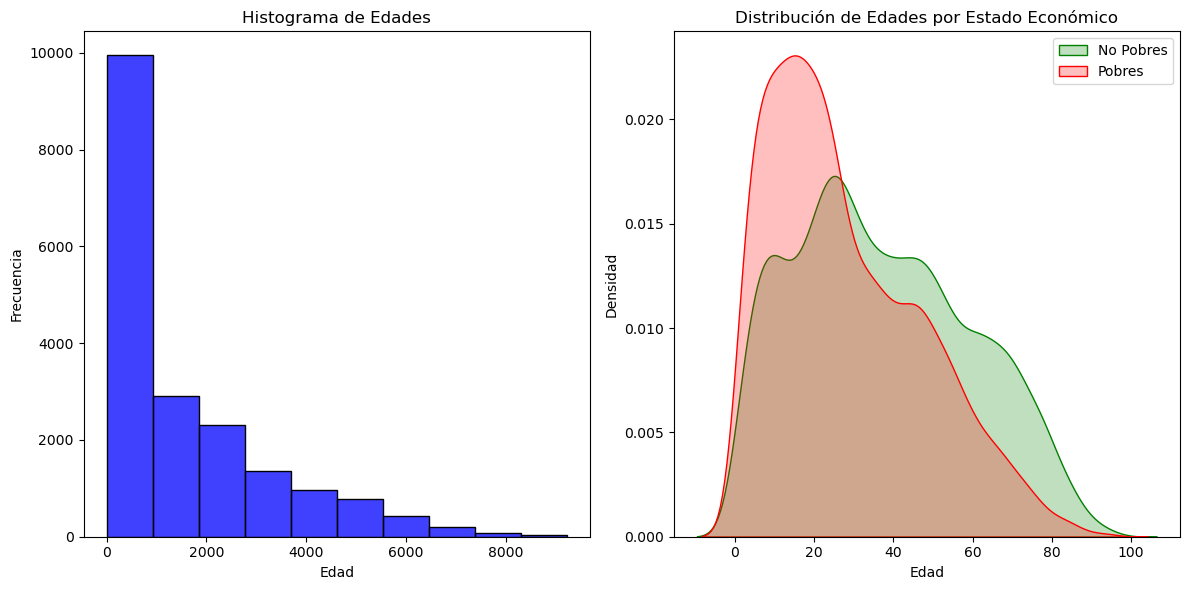

In [109]:
#CRE0 EDAD_2
union_eph['EDAD_2'] =  union_eph["CH06"].fillna(0) ** 2

# Configurar el gráfico
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# PANEL A: Historigrama de EDAD_2

sns.histplot(union_eph['EDAD_2'], bins=10, kde=False, ax=axs[0], color='blue')

axs[0].set_title('Histograma de Edades')
axs[0].set_xlabel('Edad')
axs[0].set_ylabel('Frecuencia')

# PANEL B: Distribución de kernels para POBRES y NO POBRES

sns.kdeplot(data=union_eph[union_eph['pobre'] == 0], x='CH06', fill=True, label='No Pobres', ax=axs[1], color='green')
sns.kdeplot(data=union_eph[union_eph['pobre'] == 1], x='CH06', fill=True, label='Pobres', ax=axs[1], color='red')

axs[1].set_title('Distribución de Edades por Estado Económico')
axs[1].set_xlabel('Edad')
axs[1].set_ylabel('Densidad')
axs[1].legend()

# Para mostrar los gráficos
plt.tight_layout()
plt.show()


In [26]:

# Comentario sobre la distribución
html_texto = """
<p> 
La distribución de edades en el histograma muestra que la mayoría de las personas se encuentran en el rango de edad media, con una caída en las frecuencias hacia los extremos. 
En el panel de distribución de kernels, se observa que los pobres tienden a concentrarse en un rango de edad más joven en comparación con los no pobres, quienes tienen una distribución más amplia. 
Esto podría indicar que hay menos oportunidades económicas para los jóvenes, lo que podría limitar su desarrollo personal y profesional.
</p> 
"""

display(HTML(html_texto))

In [27]:
html_texto = """
<h3 style="color: navy;">Parte I.2</h3>
<p> 
Cree la variable educ definida como la cantidad de años de educación. 
Use inteligentemente las variables CH12, CH13 y CH14 para crearla. Por ejemplo, si dice que el nivel más alto de educación 
es “Secundario” (CH12), “Sí” finalizo este nivel (CH13)  y el último año que aprobó (CH14) fue “sexto”, 
entonces puede asumir que tiene  educ=12, osea 12 años de educación formal. 

Presente una estadística descriptiva (promedio, sd, min, p50, max) de dicha variable creada y comente
</p>
"""

display(HTML(html_texto))

In [205]:
#PRESCOLAR
union_eph.loc[(union_eph.CH12 == 1 ) & (union_eph.CH13 == 0), 'EDUC']=0
union_eph.loc[(union_eph.CH12 == 1 ) & (union_eph.CH13 == 1), 'EDUC']=0

#PRIMARIA
union_eph.loc[(union_eph.CH12 == 2) & (union_eph.CH13  == 0), 'EDUC'] = union_eph['CH14']
union_eph.loc[(union_eph.CH12 == 2) & (union_eph.CH13  == 1), 'EDUC']= 6

#EGB
union_eph.loc[(union_eph.CH12 == 3) & (union_eph.CH13  == 0), 'EDUC'] = union_eph['CH14']
union_eph.loc[(union_eph.CH12 == 3) & (union_eph.CH13  == 1), 'EDUC']=9

#SECUNDARIO
union_eph.loc[(union_eph.CH12 == 4) & (union_eph.CH13  == 0), 'EDUC'] = union_eph['CH14'] + 6
union_eph.loc[(union_eph.CH12 == 4) & (union_eph.CH13  == 1 ), 'EDUC']=12

#POLIMODAL
union_eph.loc[(union_eph.CH12 == 5) & (union_eph.CH13  == 0), 'EDUC'] = union_eph['CH14'] + 9
union_eph.loc[(union_eph.CH12 == 5) & (union_eph.CH13 == 1), 'EDUC']=12

#TERCIARIO
union_eph.loc[(union_eph.CH12 == 6) & (union_eph.CH13  == 0), 'EDUC'] = union_eph['CH14'] + 12
union_eph.loc[(union_eph.CH12 == 6) & (union_eph.CH13 == 1), 'EDUC']=14

#UNIVERSITARIO
union_eph.loc[(union_eph.CH12 == 7) & (union_eph.CH13  == 0), 'EDUC'] = union_eph['CH14'] + 12 
union_eph.loc[(union_eph.CH12 == 7) & (union_eph.CH13 == 1), 'EDUC']=17

#POSTGRADO
union_eph.loc[(union_eph.CH12 == 8) & (union_eph.CH13  == 0), 'EDUC'] = union_eph['CH14'] + 17
union_eph.loc[(union_eph.CH12 == 8) & (union_eph.CH13 == 1), 'EDUC']=20

#ESPECIAL
union_eph.loc[(union_eph.CH12 == 9) & (union_eph.CH13  == 0), 'EDUC'] = union_eph['CH14'] 
union_eph.loc[(union_eph.CH12 == 9) & (union_eph.CH13 == 1), 'EDUC']=6



Estadísticas descriptivas de la variable EDUC:
count    7835.000000
mean       10.971538
std         3.688930
min         0.000000
25%         6.000000
50%        12.000000
75%        12.000000
max        20.000000
Name: EDUC, dtype: float64

Desviación estándar: 3.69


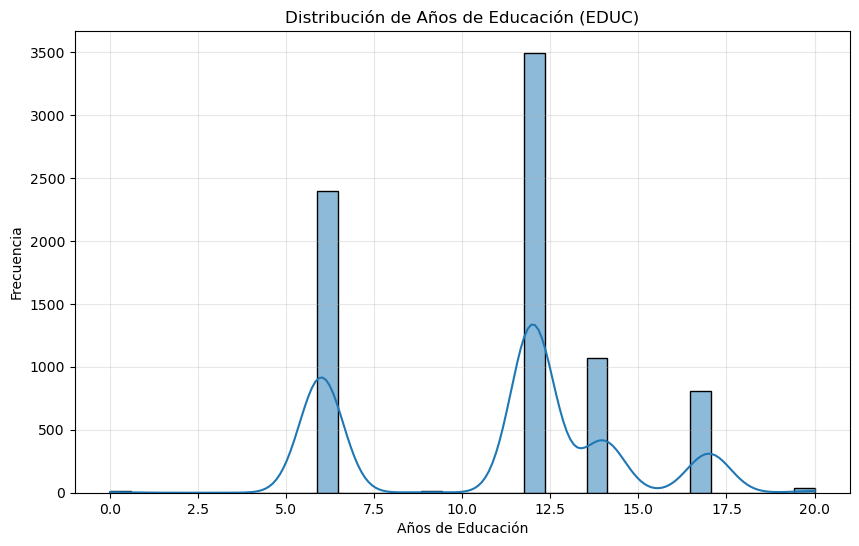

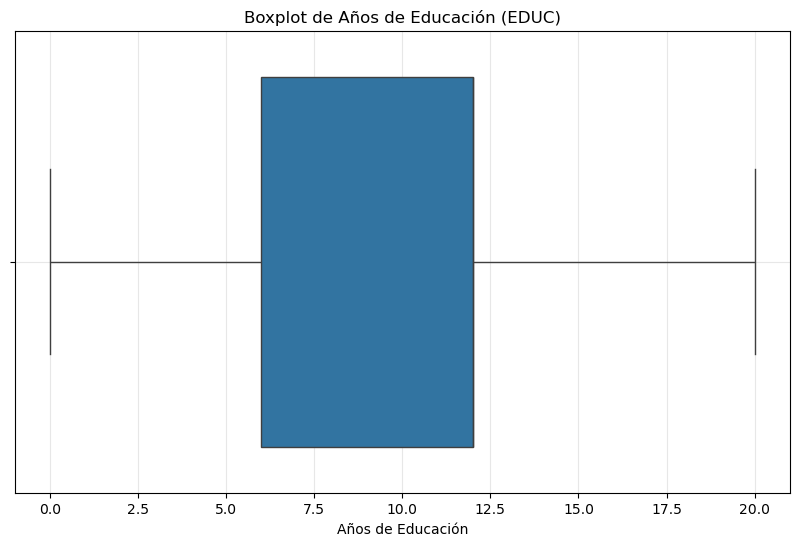

In [206]:

# Hago las estadísticas descriptivas

stats = union_eph['EDUC'].describe()

print("Estadísticas descriptivas de la variable EDUC:")
print(stats)

#Veo la desviación estándar específicamente

sd = union_eph['EDUC'].std()
print(f"\nDesviación estándar: {sd:.2f}")

# Histograma para visualizar la distribución

plt.figure(figsize=(10, 6))

sns.histplot(union_eph['EDUC'], kde=True)

plt.title('Distribución de Años de Educación (EDUC)')
plt.xlabel('Años de Educación')
plt.ylabel('Frecuencia')
plt.grid(True, alpha=0.3)

plt.show()

# Distribución y los valores atípicos

plt.figure(figsize=(10, 6))

sns.boxplot(x=union_eph['EDUC'])

plt.title('Boxplot de Años de Educación (EDUC)')
plt.xlabel('Años de Educación')
plt.grid(True, alpha=0.3)

plt.show()

In [30]:
html_texto = """
<h3 style="color: navy;">Parte I.3</h3>
<p> 
Actualice la variable ingreso_total_familiar con el total de ingresos habituales (ITF). 
Recuerde que los pesos de 2005 tienen un poder de compra distinto a los pesos de 2025 en el primer trimestre. 
<br> 
Convierta primero los ingresos de 2005 a pesos de 2025. Similar al ítem 1, presente en un panel A, 
un histograma de la variable ingreso_total_familiar y las distribuciones de kernels para pobres y no pobres en un panel B. 
<br> 
Comente brevemente la distribución de ingresos en estos dos panels (3-4 oraciones). 
<br> 
En cada panel, sume una linea vertical con la línea de la pobreza calculada en el TP2.
</p>
"""

display(HTML(html_texto))




Inflación acumulada desde 1er Trim 2005 hasta el 1er Trim 2025: 64816.31%
Factor de actualización: 649.16


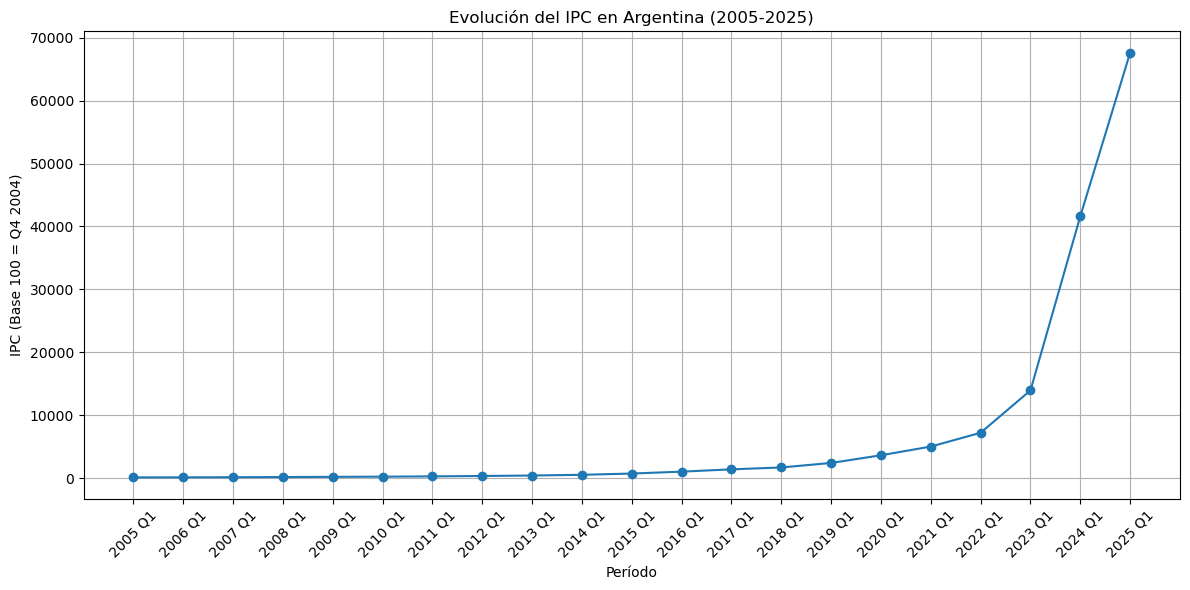

In [38]:
# Debido a la controversia sobre los datos del INDEC entre 2007-2015, utilizaremos allí el IPC Congreso
# Fuente 1: INDEC oficial para períodos 2005-2007 y 2016-2025
# Fuente 2: Estimaciones alternativas para 2007-2015 (IPC Congreso, consultoras privadas)

# Creo los trimestrales del periodo
periodos = []

for anio in range(2005, 2026):
    for trim in range(1, 5):
        if anio == 2025 and trim > 1:
            break
        periodos.append(f"{anio} Q{trim}")

# Estos son los valores
ipc_valores = [
    # 2005
    104.2, 107.8, 111.0, 114.8,
    # 2006
    118.9, 123.5, 127.2, 131.1,
    # 2007
    135.6, 141.2, 147.3, 153.8,
    # 2008
    162.5, 172.3, 181.4, 188.6,
    # 2009
    196.2, 203.5, 209.8, 216.3,
    # 2010
    224.8, 235.2, 246.3, 257.5,
    # 2011
    270.4, 285.6, 300.2, 315.8,
    # 2012
    332.1, 350.4, 368.2, 386.5,
    # 2013
    406.8, 430.2, 455.0, 481.3,
    # 2014
    520.6, 567.5, 615.8, 665.0,
    # 2015
    720.5, 782.3, 848.8, 925.2,
    # 2016
    1020.8, 1122.9, 1213.5, 1298.6,
    # 2017
    1388.5, 1456.9, 1518.5, 1585.8,
    # 2018
    1686.2, 1812.7, 1978.6, 2178.5,
    # 2019
    2405.3, 2685.9, 2954.5, 3294.1,
    # 2020
    3623.5, 3877.2, 4187.4, 4556.3,
    # 2021
    5012.0, 5513.2, 6009.4, 6550.2,
    # 2022
    7205.2, 8145.9, 9452.2, 11247.1,
    # 2023
    13946.4, 17851.4, 23206.8, 32025.4,
    # 2024
    41633.0, 49959.6, 57453.5, 63198.9,
    # 2025
    67642.8
]

# Cre0 el DataFrame con el diccionario
df = pd.DataFrame({
    'Periodo': periodos,
    'IPC': ipc_valores
})

# Calculo la inflación acumulada desde el 2005 hasta el 2025
inflacion_acumulada = (df['IPC'].iloc[-1] / df['IPC'].iloc[0] - 1) * 100


# El gráfico de la evolución del IPC
plt.figure(figsize=(12, 6))

plt.plot(df['Periodo'][::4], df['IPC'][::4], marker='o')  # Muestra un punto por año, para mejorar la visualización

plt.title('Evolución del IPC en Argentina (2005-2025)')
plt.xlabel('Período')
plt.ylabel('IPC (Base 100 = Q4 2004)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Mostrar el resultado
print(f"Inflación acumulada desde 1er Trim 2005 hasta el 1er Trim 2025: {inflacion_acumulada:.2f}%")
print(f"Factor de actualización: {df['IPC'].iloc[-1] / df['IPC'].iloc[0]:.2f}")

# Mostrar el gráfico
plt.show()

In [32]:
#Introducir P21 al dataframe union_eph
# Se debe separar los datos eph_union de 2005 y 2025
#con la 2005
# ITF_05_25= ITF_2005 + ( P21_2005 * (1+TT_05_25))
# Calcular P21_2005 * (1+TT_05_25) -> sumarlo a ITF 2005 
# Unificarlo finalmente con el 2025
#Armar graficos

#Creo una columna nueva,P21_05_25, de P21 (ingreso habituales) a valores de 2025
#union_eph.loc[(union_eph.ANIO == 2005 ) , 'P21_05_25']=union_eph["P21"].fillna(0)*(1+649.16)
#union_eph.loc[(union_eph.ANIO == 2025 ) , 'P21_05_25']= 0

#union_eph["ITF_05_25"] = union_eph["ITF"].fillna(0) + union_eph["P21_05_25"].fillna(0)



In [112]:
#Creo una columna nueva,ITF_05_25, de ITF a valores de 2025

union_eph.loc[(union_eph.ANIO == 2005 ) , 'ITF_05_25']=union_eph["ITF"].fillna(0)*(1+649.16)
union_eph.loc[(union_eph.ANIO == 2025 ) , 'ITF_05_25']=union_eph["ITF"].fillna(0)



In [113]:
union_eph

,CODUSU,NRO_HOGAR,REGION,AGLOMERADO,PONDERA,CH03,CH04,CH06,CH07,CH08,...,IV6,IV8,II8,IX_TOT,pobre,ingreso_necesario,ad_equiv_hogar,EDAD_2,EDUC,ITF_05_25
0,TQRMNORWTHJOKOCDEGPDJ00875828,1.0,40,19,200.0,1,0,73.0,5,1.0,...,1.0,1.0,2.0,8.0,1,2413819.97,6.61,5329.0,6.0,1590000.0
1,TQRMNORWTHJOKOCDEGPDJ00875828,1.0,40,19,200.0,3,0,38.0,5,1.0,...,1.0,1.0,2.0,8.0,1,2413819.97,6.61,1444.0,12.0,1590000.0
2,TQRMNORWTHJOKOCDEGPDJ00875828,1.0,40,19,200.0,5,0,34.0,5,1.0,...,1.0,1.0,2.0,8.0,1,2413819.97,6.61,1156.0,14.0,1590000.0
3,TQRMNORWTHJOKOCDEGPDJ00875828,1.0,40,19,200.0,5,1,19.0,5,1.0,...,1.0,1.0,2.0,8.0,1,2413819.97,6.61,361.0,NaN,1590000.0
4,TQRMNORWTHJOKOCDEGPDJ00875828,1.0,40,19,200.0,5,1,16.0,5,1.0,...,1.0,1.0,2.0,8.0,1,2413819.97,6.61,256.0,6.0,1590000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19001,287879,1.0,40,29,266.0,3,0,10.0,5,2.0,...,NaN,NaN,1.0,3.0,1,457.31,2.23,100.0,NaN,253562.4
19002,288077,1.0,40,29,555.0,1,1,31.0,2,1.0,...,NaN,NaN,1.0,4.0,0,549.59,2.68,961.0,14.0,1462860.0
19003,288077,1.0,40,29,555.0,2,0,29.0,2,1.0,...,NaN,NaN,1.0,4.0,0,549.59,2.68,841.0,14.0,1462860.0
19004,288077,1.0,40,29,555.0,3,1,4.0,5,1.0,...,NaN,NaN,1.0,4.0,0,549.59,2.68,16.0,NaN,1462860.0


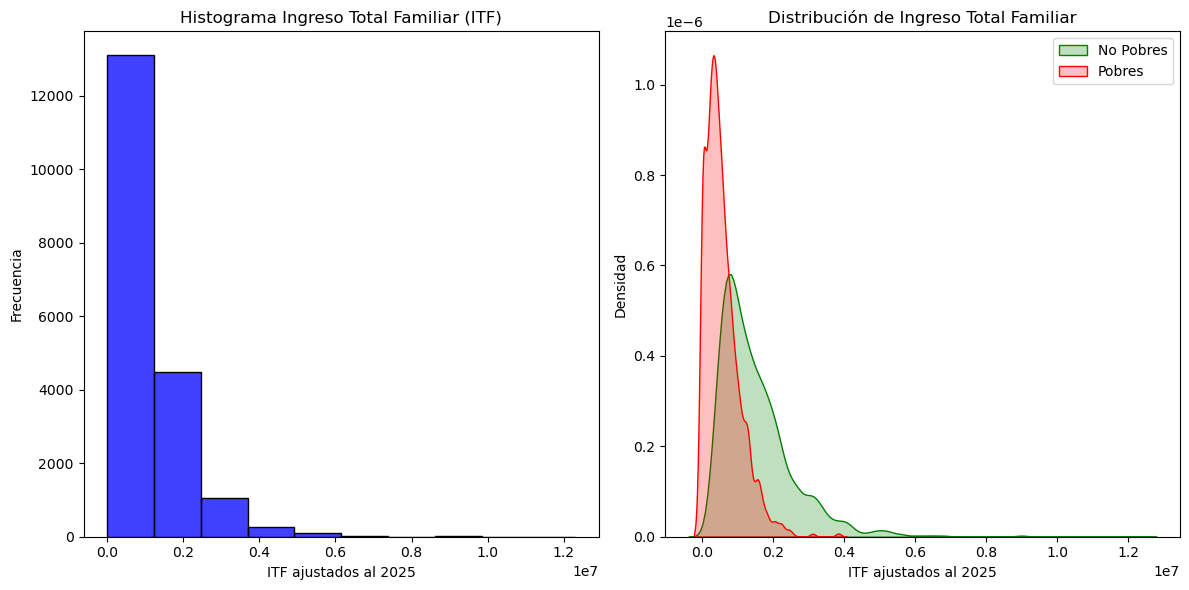

In [114]:

# Configurar el gráfico
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# PANEL A: Historigrama de Ingreso Total Familiar ajustados al 2025 

sns.histplot(union_eph['ITF_05_25'], bins=10, kde=False, ax=axs[0], color='blue')

axs[0].set_title('Histograma Ingreso Total Familiar (ITF)')
axs[0].set_xlabel('ITF ajustados al 2025')
axs[0].set_ylabel('Frecuencia')


# PANEL B: Distribución de kernels para POBRES y NO POBRES
sns.kdeplot(data=union_eph[union_eph['pobre'] == 0], x='ITF_05_25', fill=True, label='No Pobres', ax=axs[1], color='green')
sns.kdeplot(data=union_eph[union_eph['pobre'] == 1], x='ITF_05_25', fill=True, label='Pobres', ax=axs[1], color='red')

axs[1].set_title('Distribución de Ingreso Total Familiar')
axs[1].set_xlabel('ITF ajustados al 2025')
axs[1].set_ylabel('Densidad')
axs[1].legend()

# Para mostrar los gráficos
plt.tight_layout()
plt.show()


In [34]:
html_texto = """
<h3 style="color: navy;">Parte I.4</h3>
<p> 
Para el jefe del hogar, cree la variable horastrab como el total de horas trabajadas 
como la suma de las horas en la ocupación principal y otras ocupaciones (PP3E_TOT + PP3F_TOT). 
<br> 
Presente una estadística descriptiva (promedio, sd, min, p50, max) de dicha variable creada y comente</p>
"""

display(HTML(html_texto))



Estadísticas descriptivas de la variable 'horastrab':
count    7065.000000
mean       38.184996
std        18.194826
min         1.000000
25%        24.000000
50%        40.000000
75%        48.000000
max       112.000000
Name: horastrab, dtype: float64

Desviación estándar: 18.19


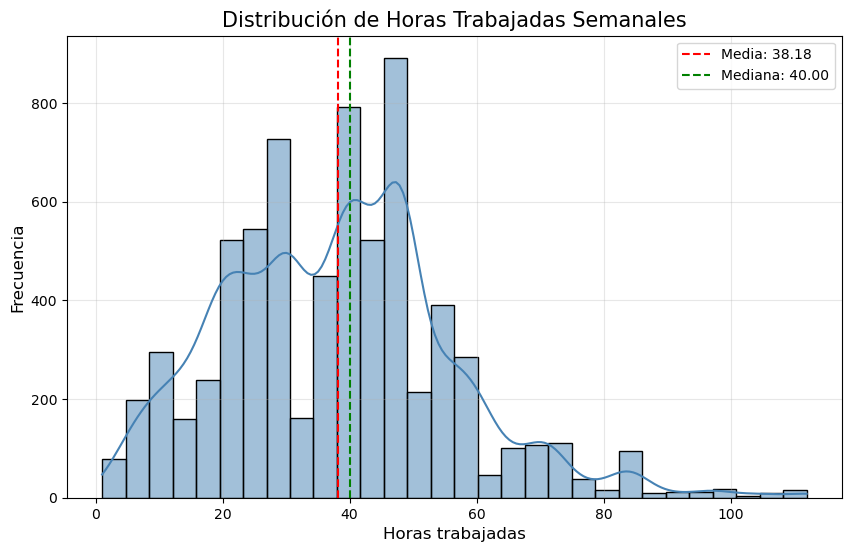

In [115]:

# Creo una nueva columna con la suma de horas semanales dedicadas a las actividades principales y a las secundarias, 
# donde conjuntamente no superen las 120hs (16hs diarias) y los ceros los vuelvo nulls para no distorcionar lo informado.

union_eph["horastrab"] = np.where((union_eph["PP3E_TOT"].fillna(0) + union_eph["PP3F_TOT"].fillna(0))>112,112,(union_eph["PP3E_TOT"].fillna(0) + union_eph["PP3F_TOT"].fillna(0)))
union_eph["horastrab"] = union_eph["horastrab"].replace(0, np.nan)

# Las estadísticas descriptivas
stats = union_eph["horastrab"].describe()
print("Estadísticas descriptivas de la variable 'horastrab':")
print(stats)

# La desviación estándar explícitamente
sd = union_eph["horastrab"].std()
print(f"\nDesviación estándar: {sd:.2f}")

# El HISTOGRAMA
plt.figure(figsize=(10, 6))

sns.histplot(data=union_eph, x="horastrab", bins=30, kde=True, color='steelblue')

plt.axvline(union_eph["horastrab"].mean(), color='red', linestyle='--', label=f'Media: {union_eph["horastrab"].mean():.2f}')
plt.axvline(union_eph["horastrab"].median(), color='green', linestyle='--', label=f'Mediana: {union_eph["horastrab"].median():.2f}')

plt.title('Distribución de Horas Trabajadas Semanales', fontsize=15)
plt.xlabel('Horas trabajadas', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

plt.legend()
plt.grid(True, alpha=0.3)


In [36]:
html_texto = """
<h3 style="color: navy;">Parte I.5</h3>
<p> 
¿Cuál es el tamaño de la de la base de datos para su región con las variables originales unificadas? 
Para ello complete la tabla 1 que se le diseña abajo y comente.
"""

display(HTML(html_texto))


In [37]:
##############################################################

#destino
carpeta2 = r'C:\Users\rodol\Desktop\BDyML\Repositorio\BigDataUBA-Grupo3\TP3-Grupo3\outputs'

#2005
# Asi se llamara el excel
archivo_nombre = "union_eph.xlsx"

destino = os.path.join(carpeta2, archivo_nombre)

# Guardo el archivo
union_eph.to_excel(destino, index=False)

In [212]:
MnS_Data["Anios_Educacion"].value_counts()

Anios_Educacion
0.0     11182
12.0     3496
6.0      2398
14.0     1072
17.0      812
20.0       36
9.0        10
Name: count, dtype: int64

Parte 2

In [207]:
### Creo la base de datos para esta parte, uso los datos de ingresos a precios constantes .
var_Mns = ['IX_TOT','EDAD_2','ITF_05_25','horastrab','EDUC','CH06']
MnS_Data = union_eph[var_Mns]
columnas_a_llenar = ['EDUC', 'horastrab']
# Rellenamos los NaN con 0 solo en esas columnas
MnS_Data[columnas_a_llenar] = MnS_Data[columnas_a_llenar].fillna(0)
MnS_Data.columns = ['Miembros_Hogar', 'Edad_Cuadrado', 'Ingreso_Familiar', 'Horas_Trabajadas', 'Anios_Educacion', 'Edad']
MnS_Data

C:\Users\Rafael\AppData\Local\Temp\ipykernel_10696\3053514346.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MnS_Data[columnas_a_llenar] = MnS_Data[columnas_a_llenar].fillna(0)


,Miembros_Hogar,Edad_Cuadrado,Ingreso_Familiar,Horas_Trabajadas,Anios_Educacion,Edad
0,8.0,5329.0,1590000.0,0.0,6.0,73.0
1,8.0,1444.0,1590000.0,15.0,12.0,38.0
2,8.0,1156.0,1590000.0,8.0,14.0,34.0
3,8.0,361.0,1590000.0,0.0,0.0,19.0
4,8.0,256.0,1590000.0,0.0,6.0,16.0
...,...,...,...,...,...,...
19001,3.0,100.0,253562.4,0.0,0.0,10.0
19002,4.0,961.0,1462860.0,0.0,14.0,31.0
19003,4.0,841.0,1462860.0,0.0,14.0,29.0
19004,4.0,16.0,1462860.0,0.0,0.0,4.0


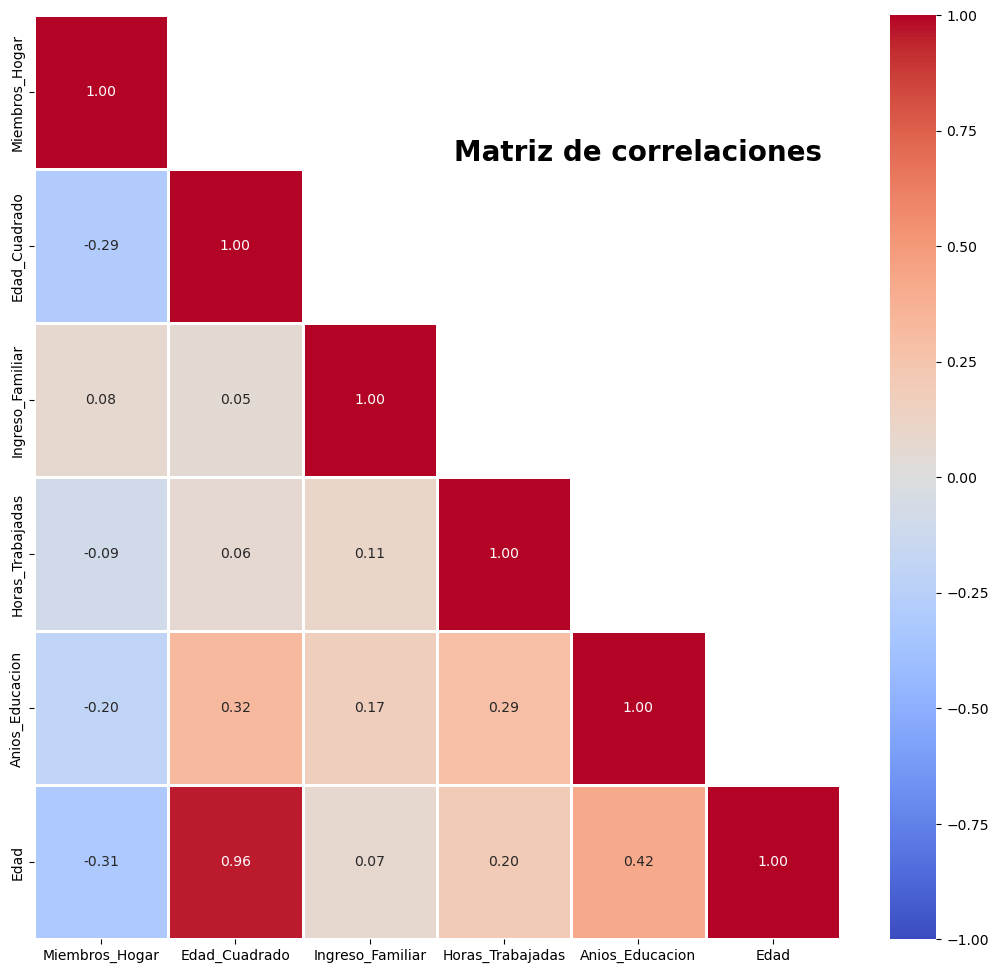

In [173]:
upp_mat = np.triu(MnS_Data.corr())
plt.figure(figsize=(13, 12))
upp_mat = np.triu(MnS_Data.corr(),k=1)
sns.heatmap(MnS_Data.corr(), vmin=-1, vmax=+1, annot=True, cmap="coolwarm", fmt=".2f",linewidths=1, mask = upp_mat)
plt.text(x=4.5,  y=1,  s='Matriz de correlaciones\n',horizontalalignment='center',verticalalignment='center', fontsize=20,fontweight='bold')
plt.gca().grid(False)

2.b

In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [175]:
#Estandarizamos los datos
scaler = StandardScaler(with_std=True, with_mean=True) 
# Aplicamos fit_transform al DataFrame
Pca_data = pd.DataFrame(scaler.fit_transform(MnS_Data), columns=MnS_Data.columns)
Pca_data

,Miembros_Hogar,Edad_Cuadrado,Ingreso_Familiar,Horas_Trabajadas,Anios_Educacion,Edad
0,1.353959,2.217259,0.572278,-0.659257,0.250482,1.876832
1,1.353959,-0.055431,0.572278,0.037421,1.267933,0.238844
2,1.353959,-0.223908,0.572278,-0.287696,1.607084,0.051646
3,1.353959,-0.688976,0.572278,-0.659257,-0.766970,-0.650349
4,1.353959,-0.750400,0.572278,-0.659257,0.250482,-0.790748
...,...,...,...,...,...,...
19001,-0.717969,-0.841658,-0.840049,-0.659257,-0.766970,-1.071546
19002,-0.303583,-0.337981,0.437918,-0.659257,1.607084,-0.088753
19003,-0.303583,-0.408180,0.437918,-0.659257,1.607084,-0.182353
19004,-0.303583,-0.890798,0.437918,-0.659257,-0.766970,-1.352344


In [178]:
pca = PCA()
eph_pca = pca.fit_transform(Pca_data)

In [182]:
scores = eph_pca
eph_pca

array([[ 1.98342274e+00, -3.66944295e-01, -2.31289496e+00,
         1.28997894e+00,  2.14522382e-04, -1.21084729e-01],
       [ 2.64516220e-01,  1.19434675e+00, -7.55941905e-01,
         7.45135012e-01,  1.08925908e+00,  1.42438751e-01],
       [ 1.22742839e-01,  1.20794258e+00, -8.03997532e-01,
         5.49730084e-01,  1.56174435e+00,  1.30938489e-01],
       ...,
       [ 3.00837811e-01,  5.34722050e-01, -5.82546108e-02,
        -8.46912128e-01,  1.54643020e+00,  1.12276305e-01],
       [-1.63191037e+00, -4.13690257e-03, -6.85311375e-02,
        -1.07473156e+00, -1.90888884e-01, -2.64235534e-01],
       [-1.72121845e+00,  1.95557005e-02, -3.85096659e-02,
        -1.10513303e+00, -1.71448271e-01, -3.59357111e-01]])

In [181]:
loading_vectors = pca.components_ # cada fila corresponde a un CP y cada columna, a una variable
print("Loadings:\n", pca.components_)
print("Loadings del CP1:\n",pca.components_[0]) 
pca.components_[0,0] #loadings del CP1 variable 1, phi(1,1) en ecuacion 4

Loadings:
 [[-0.31171179  0.56955413  0.09866567  0.21491388  0.40238574  0.60050535]
 [ 0.2814409  -0.25127704  0.64184418  0.54526271  0.35348553 -0.15304731]
 [-0.47635914 -0.29446384 -0.53442246  0.58035679  0.16050038 -0.19542591]
 [ 0.75520389  0.17928324 -0.48334074  0.34642248 -0.04167618  0.2053312 ]
 [ 0.16235133 -0.1509516  -0.24303113 -0.43903098  0.82607138 -0.12903254]
 [ 0.00422982 -0.68617062  0.00337215 -0.0832458  -0.05694288  0.72039452]]
Loadings del CP1:
 [-0.31171179  0.56955413  0.09866567  0.21491388  0.40238574  0.60050535]


np.float64(-0.3117117869209169)

In [154]:
#Comprobamos la condicion de los loadings del CP1
(-0.31171179)**2+(0.56955413)**2+(0.09866567)**2+(0.21491388)**2+(0.40238574)**2+(0.60050535)**2

0.9999999964122344

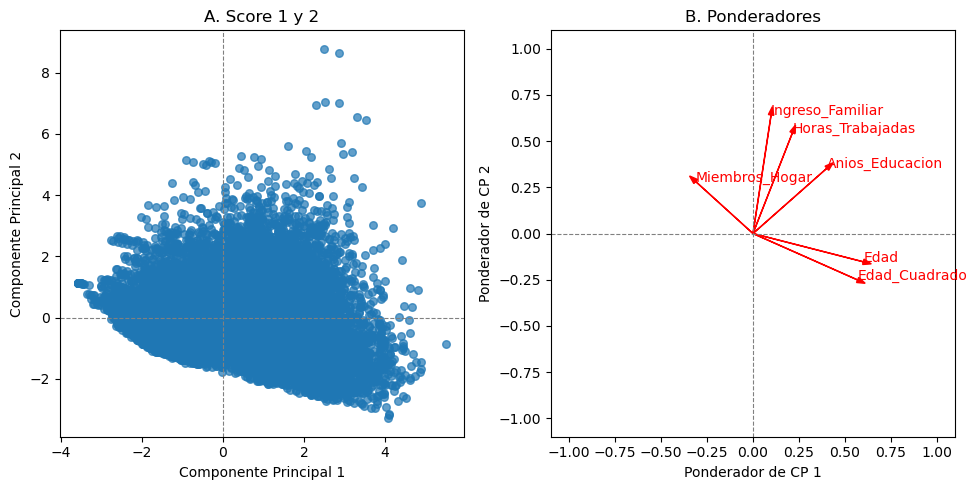

In [183]:
#Armamos el grafico
i, j = 0, 1 # Componentes
fig, (ax_scores, ax_ponderadores) = plt.subplots(1, 2, figsize=(10, 5)) # 1 fila, 2 columnas

# ---
## Panel A. Score 1 y 2
ax_scores.scatter(scores[:,0], scores[:,1], s=30, alpha=0.7) # graficamos los valores de los CP1 y CP2
ax_scores.set_xlabel('Componente Principal %d' % (i+1))
ax_scores.set_ylabel('Componente Principal %d' % (j+1))
ax_scores.set_title('A. Score 1 y 2')

# Líneas punteadas en los ejes
ax_scores.axhline(0, color='gray', linestyle='--', linewidth=0.8) # Eje horizontal en y=0
ax_scores.axvline(0, color='gray', linestyle='--', linewidth=0.8) # Eje vertical en x=0

# ---
## Panel B. Ponderadores
# Líneas punteadas en los ejes
ax_ponderadores.axhline(0, color='gray', linestyle='--', linewidth=0.8) # Eje horizontal en y=0
ax_ponderadores.axvline(0, color='gray', linestyle='--', linewidth=0.8) # Eje vertical en x=0

# ponderadores
for k in range(pca.components_.shape[1]): # loop que itera por la cantidad de features
    ax_ponderadores.arrow(0, 0, pca.components_[i,k], pca.components_[j,k], color ='red', head_width=0.03) # flecha desde el origen (0) a las coordenadas
    ax_ponderadores.text(pca.components_[i,k], pca.components_[j,k], Pca_data.columns[k], color ='red') # al final de cada flecha, nombre de la variable

ax_ponderadores.set_xlabel('Ponderador de CP %d' % (i+1))
ax_ponderadores.set_ylabel('Ponderador de CP %d' % (j+1))
ax_ponderadores.set_title('B. Ponderadores')
ax_ponderadores.set_xlim(-1.1, 1.1)
ax_ponderadores.set_ylim(-1.1, 1.1)

plt.tight_layout() # Ajusta los subplots para que no se superpongan
plt.show()

In [184]:
print(pca.explained_variance_ratio_)

[0.40595689 0.19716504 0.15926952 0.12744168 0.10545346 0.00471341]


In [185]:
#Comprobamos que la suma de 1
0.40595689 +0.19716504 +0.15926952 +0.12744168 +0.10545346 +0.00471341

1.0

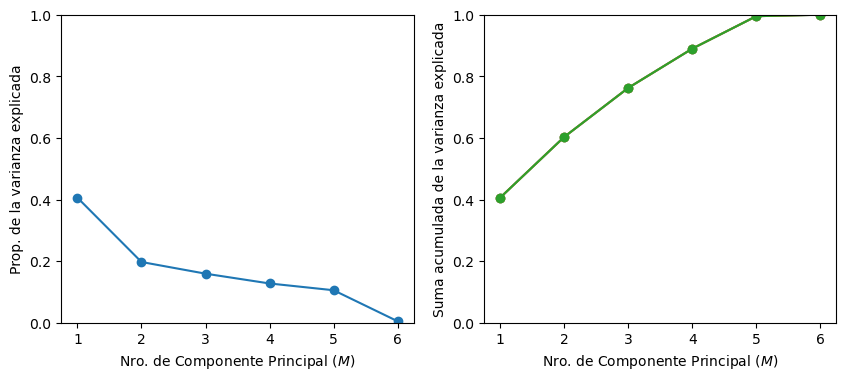

In [189]:
#Armamos el gràfico
ax = axes[1]
ax.plot(ticks, pca.explained_variance_ratio_.cumsum(), marker='o') 
ax.set_xlabel('Nro. de Componente Principal ($M$)')
ax.set_ylabel('Suma acumulada de la varianza explicada')
ax.set_ylim([0, 1])
ax.set_xticks(ticks)
fig